In [1]:
%pylab inline
import pandas as pd
import re
import seaborn as sns
figsize(13,5)

sns.set_style('darkgrid')

Populating the interactive namespace from numpy and matplotlib


In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

>Such is the way the gods spun life for unfortunate mortals,  
>that we live in unhappiness, but the gods themselves have no sorrows.  
>  ---  *Iliad* 24.525-526

Homer's *Iliad* is a time-tested classic of world literature. It is the story of Achilles' anger ("Sing, goddess, the anger of Peleus' son Achilleus...") and its effect on a pivotal point in the Trojan War. A long (15,693 lines) and meandering poem, the *Iliad* contains many graphic depictions of ancient warfare. We will be focusing on the recorded battles. All line numbers quotes come from the Lattimore translation.

I have compiled a list of all personal battles I could find that occur in the *Iliad*. There may be a few battles I may have missed, but most of them are there. The list of battles, with the names of the combatants, their respective factions, the winning faction (or draw), whether or not the loser was killed, the initial location in the poem of the battle, and notes are stored in the Excel spreadsheet `Iliad_battles.xlsx`. 

Let's what we can learn from this dataset by delving into it with pandas.

In [3]:
df = pd.read_excel('Iliad_battles.xlsx', 0, encoding='utf-8')
# replace strange unicode whitespaces
df.replace(u'\xa0', u' ', regex=True, inplace=True)
df.head()

,Combatant1,Combatant2,C1_Faction,C2_Faction,Winner,Loser_Killed,Iliad_loc,Notes
0,"Menelaos, son of Atreus","Alexandros (Paris), son of Priam",G,T,DRAW,NaN,3.380,Aphrodite intervenes and carries Paris off int...
1,"Antilochos, son of Nestor","Echepolos, son of Thalysias",G,T,G,yes,4.457,Echepolos killed by spear to the forehead (4.4...
2,"Elephanor, leader of the Abantes","Agenor, son of Antenor",G,T,T,yes,4.465,Elephanor killed by sword between the ribs (4....
3,"Aias (Ajax), son of Telamon","Simoeisios, son of Anthemion",G,T,G,yes,4.479,Simoeisios killed by spear to the right chest ...
4,"Antiphos, son of Priam","Leukos, companion of Odysseus",T,G,T,yes,4.489,Leukos killed by spear (aimed at Aias) to the...


In [4]:
df.shape

(263, 8)

There are 263 battles recorded, or at least this is as many as I could find. 

Now let's take a look at the names of the combatants from both factions, Greek and Trojan.

In [5]:
com1 = df.Combatant1
com2 = df.Combatant2
coms = pd.concat([com1,com2])
combatants = pd.Series(coms.unique())
combatants.head()

0             Menelaos, son of Atreus
1           Antilochos, son of Nestor
2    Elephanor, leader of the Abantes
3         Aias (Ajax), son of Telamon
4              Antiphos, son of Priam
dtype: object

In [6]:
c = []
for combatant in combatants:
    match_comma = re.search(r', ', combatant)
    # only split combatant name if there's a comma in it
    if match_comma:
        ci = combatant.split(',')[0]
        c.append(ci)

c[:5]

[u'Menelaos', u'Antilochos', u'Elephanor', u'Aias (Ajax)', u'Antiphos']

In [7]:
kills = df[df.Loser_Killed == 'yes']
nokill = df[df.Loser_Killed != 'yes']
print nokill.shape
print kills.shape

(27, 8)
(236, 8)


## Kill Rankings

There are 27 battles where there were no kills, with either a loser not being killed or the outcome being a draw. Draw outcomes are NaNs. This leaves 236 battles where the loser is killed. Let's tally up a kill count for each of the combatants involved in the story.

In [8]:
kills.head()

,Combatant1,Combatant2,C1_Faction,C2_Faction,Winner,Loser_Killed,Iliad_loc,Notes
1,"Antilochos, son of Nestor","Echepolos, son of Thalysias",G,T,G,yes,4.457,Echepolos killed by spear to the forehead (4.4...
2,"Elephanor, leader of the Abantes","Agenor, son of Antenor",G,T,T,yes,4.465,Elephanor killed by sword between the ribs (4....
3,"Aias (Ajax), son of Telamon","Simoeisios, son of Anthemion",G,T,G,yes,4.479,Simoeisios killed by spear to the right chest ...
4,"Antiphos, son of Priam","Leukos, companion of Odysseus",T,G,T,yes,4.489,Leukos killed by spear (aimed at Aias) to the...
5,"Odysseus, son of Laertes","Demokoön, bastard son of Priam",G,T,G,yes,4.499,Demokoön killed by spear to the temple (4.499-...


But first, let's split up the factions. To keep things simple, I've denoted **G** for the Greek (or Achaian) confederation that beseiged Troy, and **T** for the Trojans. There's also an Olympian faction denoted **O**, but each of the Olympian dieties are working on the side of the Greek or Trojan factions, so battles involving the Olympians will have **GO** or **TO**. We may return to the role the gods played later. 

First let's look at how many enemies each Greek hero killed throughout the course of the poem.  I did this by taking a subset of the `kills` dataframe where the `Winner` has value `'G'`, then generating a list of Greek heroes with kills, then counted up duplicates. 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

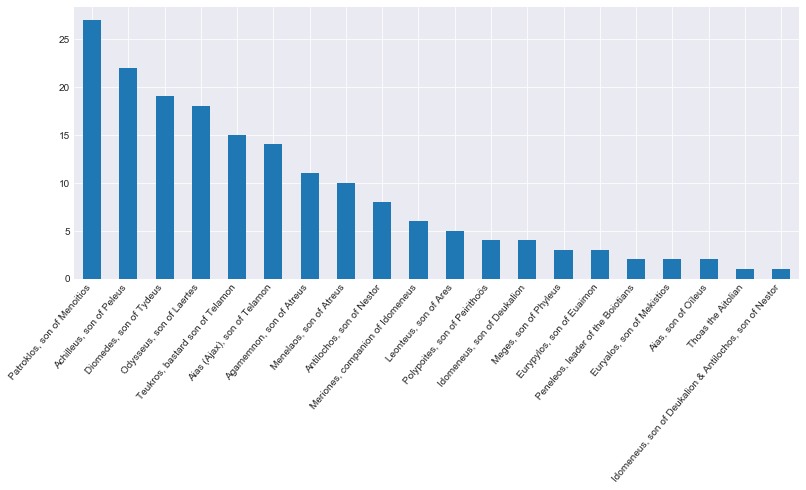

In [9]:
gkills = kills[kills.Winner.str.contains('G')]
g1 = gkills['Combatant1'][gkills.C1_Faction.str.contains('G')]
g2 = gkills['Combatant2'][gkills.C2_Faction.str.contains('G')]

gkill_list = pd.concat([g1,g2])
gkill_list.value_counts().head(20).plot(kind='bar')
xticks(rotation = 50, ha = 'right')

In [10]:
gkill_list[gkill_list.str.contains('&')]

137    Idomeneus, son of Deukalion & Antilochos, son ...
dtype: object

Sometimes there are multiple heroes who share a kill. Let's split up those entries and add them to the list.

In [11]:
# create modified kill list for Greek faction
gkill_list = gkill_list.str.split('&', expand=True).apply(pd.Series,1).stack()
gkill_list = gkill_list.str.strip()
gkill_list.reset_index(drop=True, inplace=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

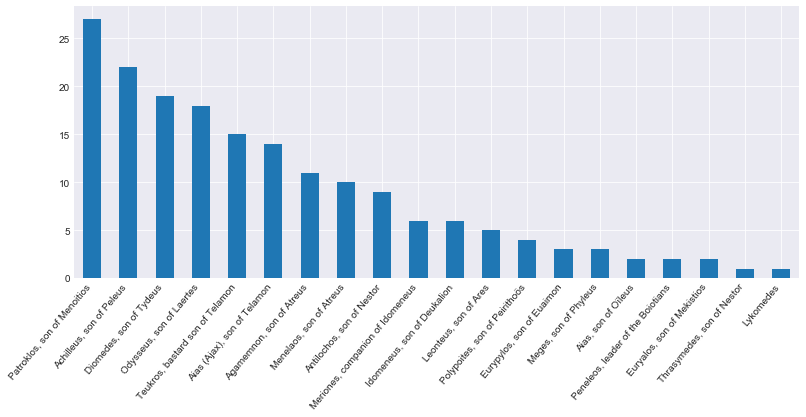

In [12]:
# plot rankings
gkill_list.value_counts().head(20).plot(kind='bar')
xticks(rotation = 50, ha = 'right')

In [13]:
print len(gkill_list[gkill_list.str.contains('Patroklos')])
print len(gkill_list[gkill_list.str.contains('Achilleus')])

28
22


The first surprising result of this plot I notice is that Achilles, the star of the show, doesn't have the most kills. It's Patroklos, his friend, who killed the most Trojans. Most of his kills are during his rampage in Book 16, before he is killed by Hector at the end of the chapter.

In [14]:
# create kill list for Trojan faction
tkills = kills[kills.Winner.str.contains('T')]
t1 = tkills['Combatant1'][tkills.C1_Faction.str.contains('T')]
t2 = tkills['Combatant2'][tkills.C2_Faction.str.contains('T')]
tkill_list = pd.concat([t1,t2])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

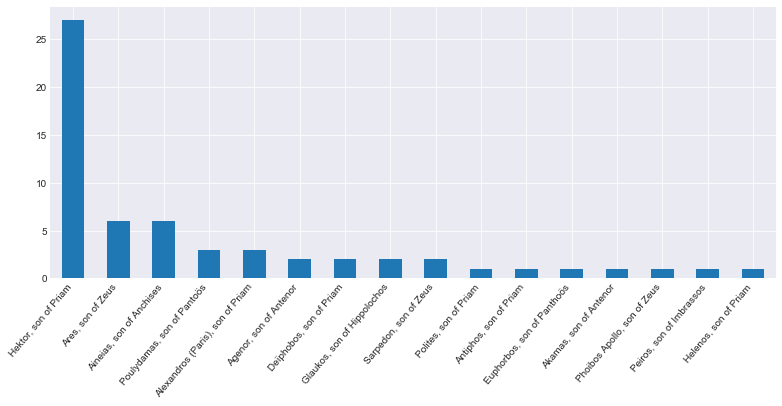

In [15]:
# plot rankings
tkill_list = tkill_list.str.split('&', expand = True).apply(pd.Series,1).stack()
tkill_list = tkill_list.str.strip()
tkill_list = tkill_list.reset_index(drop=True)

tkill_list.value_counts().head(20).plot(kind='bar')
xticks(rotation = 50, ha = 'right')

Looking at the Trojan side, we see that Hektor, arguably the most sympathetic character in the *Iliad*, racked up the most kills by far.

In [16]:
tkill_counts = tkill_list.value_counts().to_frame(name='kills')
tkill_counts['faction'] = 'T'

gkill_counts = gkill_list.value_counts().to_frame(name='kills')
gkill_counts['faction'] = 'G'

In [17]:
total_rankings=pd.concat([gkill_counts, tkill_counts])
total_rankings = (total_rankings.reset_index()
                  .rename(columns={'index':'name'})
                  .sort_values('kills', ascending=False))

In [18]:
# create pivot table with the kills for the faction corresponding to the 
# name of the warrior. For purposes of coloring the plot
rankings = (total_rankings
            .sort_values('kills', ascending=False)
            .pivot(index='name', columns='faction', values='kills'))

rankings.fillna(0, inplace=True)
rankings['tot'] = rankings['G'] + rankings['T']

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

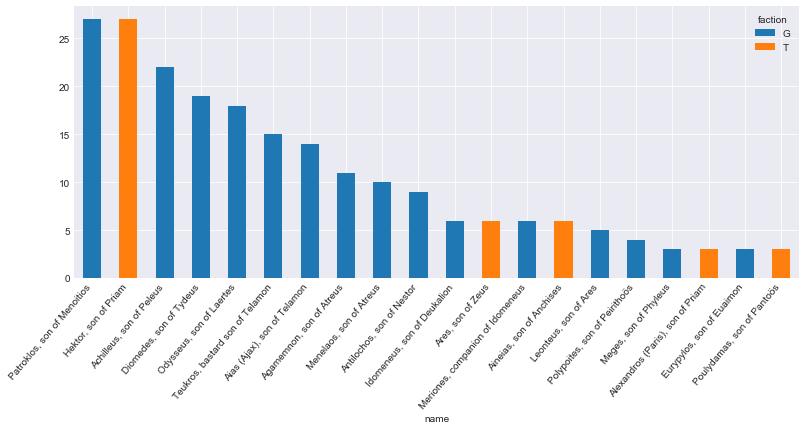

In [19]:
(rankings.sort_values('tot', ascending=False)[['G','T']]
 .head(20).plot.bar(stacked=True))
xticks(rotation = 50, ha = 'right')

Looks like a tie between Patroklos and Hektor.

## Chronology of Battles

Now let's take a look at where the major battles take place in the poem.

In [20]:
tot_lines = [0, 611, 877,461,544,909,
            529,482,565,714,579,
            848,471,837,522,725,
            867,761,617,417,503,
            611,516,898,804]

def line_ratio(lineloc):
    '''convert line locations into line ratios where 
    e.g. 1.5 refers to halfway through the first chapter'''
    chapter = int(lineloc // 1)
    line = (lineloc - chapter) * 1000
    return chapter + line / tot_lines[chapter]

def total_lines(lineloc):
    ''' convert line location as a line of total lines in the poem'''
    chapter = int(lineloc // 1)
    line = (lineloc - chapter) * 1000
    line += sum(tot_lines[:chapter-1])
    return line

df['line_ratios'] = df.Iliad_loc.apply(line_ratio)
df['line_position'] = df.Iliad_loc.apply(total_lines)

In [21]:
chapters = df.line_ratios.apply(floor)
chapters.value_counts()

5.0     43
16.0    40
11.0    38
15.0    18
13.0    18
20.0    14
14.0    14
21.0    14
8.0     13
6.0     13
12.0    12
17.0    11
4.0      7
7.0      4
10.0     2
22.0     1
3.0      1
Name: line_ratios, dtype: int64

Book 5 was the bloodiest chapter in the *Iliad*, followed by Book 16 and book 11. However, as we will see below, although Book 5 was the single bloodiest chapter, the distribution of kills from Books 13-15 is more pronounced.

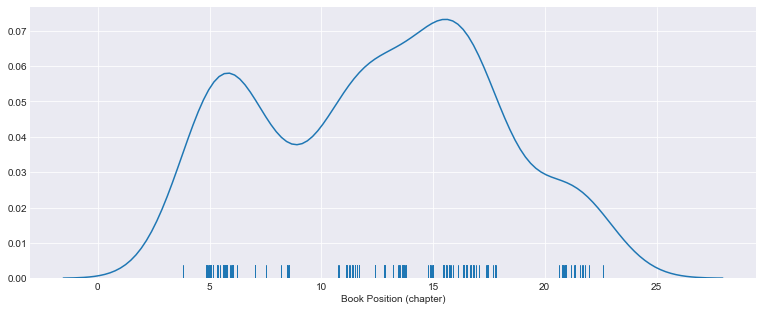

In [22]:
#df.line_ratios.plot(kind='density', rug=True)
a = sns.distplot(df.line_ratios, kde=True, rug=True, hist=False)
a.set(xlabel = 'Book Position (chapter)')
plt.show()

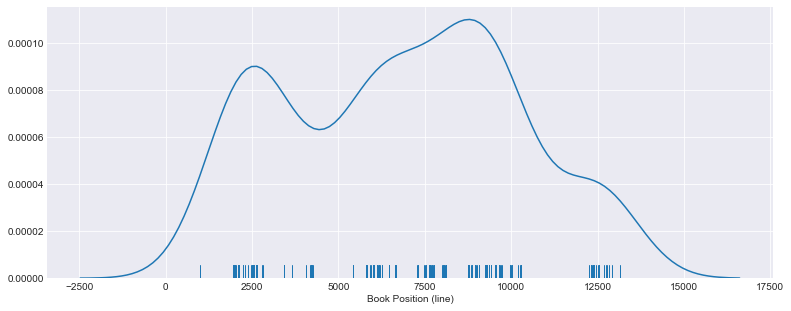

In [23]:
b = sns.distplot(df.line_position, kde=True, rug=True, hist=False)
b.set(xlabel = 'Book Position (line)')
plt.show()